<a href="https://colab.research.google.com/github/matkeii/THC/blob/main/Clase_14_Noviembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
!pip install skforecast

In [80]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
Link = 'https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv'
code = '?raw=true'
url = Link+code
df = pd.read_csv(url,sep=',',index_col=1)

In [3]:
df

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Guinea,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
29/08/2014,Nigeria,15,6.0,9.0,6.0,2.70,1.80,5.40,3.60,0.90,0.60
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88
05/09/2014,Guinea,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16
...,...,...,...,...,...,...,...,...,...,...,...
23/03/2016,Liberia,3151,NaN,1890.6,1260.4,567.18,378.12,1134.36,756.24,189.06,126.04
23/03/2016,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
23/03/2016,Liberia,2,1.0,1.2,0.8,0.36,0.24,0.72,0.48,0.12,0.08


In [4]:
df.shape #NUMERO DE ELEMENTOS QUE EXISTEN EN EL DOCUMENTO

(2484, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2484 entries, 29/08/2014 to 23/03/2016
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  2484 non-null   object 
 1   No. of confirmed cases   2484 non-null   int64  
 2   No. of confirmed deaths  1648 non-null   float64
 3   Male Cases               2484 non-null   float64
 4   Female Cases             2484 non-null   float64
 5   Boys                     2484 non-null   float64
 6   Girls                    2484 non-null   float64
 7   Adult Male               2484 non-null   float64
 8   Adult Female             2484 non-null   float64
 9   Old Male                 2484 non-null   float64
 10  Old Female               2484 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 232.9+ KB


In [6]:
df.head()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Guinea,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
29/08/2014,Nigeria,15,6.0,9.0,6.0,2.70,1.80,5.40,3.60,0.90,0.60
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88
05/09/2014,Guinea,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16


In [7]:
df.tail()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
23/03/2016,Liberia,3151,NaN,1890.6,1260.4,567.18,378.12,1134.36,756.24,189.06,126.04
23/03/2016,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
23/03/2016,Liberia,2,1.0,1.2,0.8,0.36,0.24,0.72,0.48,0.12,0.08
23/03/2016,Nigeria,19,7.0,11.4,7.6,3.42,2.28,6.84,4.56,1.14,0.76
23/03/2016,United States of America,4,1.0,2.4,1.6,0.72,0.48,1.44,0.96,0.24,0.16


In [8]:
df.isnull()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,False,False,False,False,False,False,False,False,False,False,False
29/08/2014,False,False,False,False,False,False,False,False,False,False,False
29/08/2014,False,False,False,False,False,False,False,False,False,False,False
29/08/2014,False,False,False,False,False,False,False,False,False,False,False
05/09/2014,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
23/03/2016,False,False,True,False,False,False,False,False,False,False,False
23/03/2016,False,False,True,False,False,False,False,False,False,False,False
23/03/2016,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Country                      0
No. of confirmed cases       0
No. of confirmed deaths    836
Male Cases                   0
Female Cases                 0
Boys                         0
Girls                        0
Adult Male                   0
Adult Female                 0
Old Male                     0
Old Female                   0
dtype: int64

In [10]:
df['Country'].isin(['México']).sum() #No existe méxico dentro de mis parámetros

0

In [11]:
Cuantos = df.groupby('Country').size().reset_index(name='Conteo')
Cuantos

,Country,Conteo
0,Guinea,259
1,Italy,141
2,Liberia,364
3,Mali,243
4,Nigeria,255
5,Senegal,254
6,Sierra Leone,259
7,Spain,243
8,United Kingdom,221
9,United States of America,245


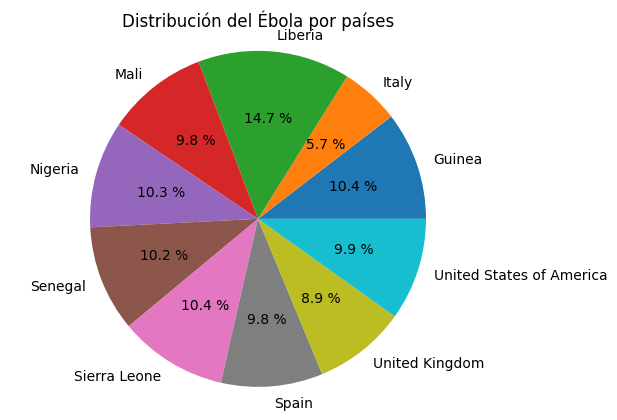

In [12]:
plt.pie(Cuantos['Conteo'],labels=Cuantos['Country'],autopct='%0.1f %%')
plt.axis("equal") #Nos acomoda la grafica en parámetros iguales
plt.title("Distribución del Ébola por países")
plt.savefig("Pastel_por_paises.png", dpi = 300,format = 'png')
plt.show()

In [13]:
[df['Country']=='Sierra Leone']

[Date
 29/08/2014    False
 29/08/2014    False
 29/08/2014     True
 29/08/2014    False
 05/09/2014    False
               ...  
 23/03/2016    False
 23/03/2016    False
 23/03/2016    False
 23/03/2016    False
 23/03/2016    False
 Name: Country, Length: 2484, dtype: bool]

In [14]:
SL=df[df['Country']=='Sierra Leone']

In [15]:
SL

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
05/09/2014,Sierra Leone,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84
08/09/2014,Sierra Leone,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36
12/09/2014,Sierra Leone,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48
16/09/2014,Sierra Leone,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56
...,...,...,...,...,...,...,...,...,...,...,...
17/12/2015,Sierra Leone,8704,3589.0,5222.4,3481.6,1566.72,1044.48,3133.44,2088.96,522.24,348.16
22/12/2015,Sierra Leone,8704,3589.0,5222.4,3481.6,1566.72,1044.48,3133.44,2088.96,522.24,348.16
23/12/2015,Sierra Leone,8704,3589.0,5222.4,3481.6,1566.72,1044.48,3133.44,2088.96,522.24,348.16


In [16]:
SL = SL.drop('Country',axis=1)

In [17]:
SL.head()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,
29/08/2014,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
05/09/2014,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84
08/09/2014,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36
12/09/2014,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48
16/09/2014,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56


In [18]:
SL.tail()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,
17/12/2015,8704,3589.0,5222.4,3481.6,1566.72,1044.48,3133.44,2088.96,522.24,348.16
22/12/2015,8704,3589.0,5222.4,3481.6,1566.72,1044.48,3133.44,2088.96,522.24,348.16
23/12/2015,8704,3589.0,5222.4,3481.6,1566.72,1044.48,3133.44,2088.96,522.24,348.16
29/12/2015,8704,3589.0,5222.4,3481.6,1566.72,1044.48,3133.44,2088.96,522.24,348.16
23/03/2016,8704,3589.0,5222.4,3481.6,1566.72,1044.48,3133.44,2088.96,522.24,348.16


In [19]:
SL[15:20]

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,
22/10/2014,3223,986.0,1933.8,1289.2,580.14,386.76,1160.28,773.52,193.38,128.92
25/10/2014,3389,1008.0,2033.4,1355.6,610.02,406.68,1220.04,813.36,203.34,135.56
29/10/2014,3700,NaN,2220.0,1480.0,666.00,444.00,1332.00,888.00,222.00,148.00
31/10/2014,3778,NaN,2266.8,1511.2,680.04,453.36,1360.08,906.72,226.68,151.12
05/11/2014,4057,893.0,2434.2,1622.8,730.26,486.84,1460.52,973.68,243.42,162.28


In [20]:
SL.shape

(259, 10)

In [21]:
SL.isnull().sum()

No. of confirmed cases     0
No. of confirmed deaths    2
Male Cases                 0
Female Cases               0
Boys                       0
Girls                      0
Adult Male                 0
Adult Female               0
Old Male                   0
Old Female                 0
dtype: int64

In [22]:
mean_values = SL['No. of confirmed deaths'].mean()
mean_values

3104.9961089494163

In [23]:
SL.fillna(mean_values,inplace=True) #Rellenar datos faltantes

In [24]:
SL.isnull().sum()

No. of confirmed cases     0
No. of confirmed deaths    0
Male Cases                 0
Female Cases               0
Boys                       0
Girls                      0
Adult Male                 0
Adult Female               0
Old Male                   0
Old Female                 0
dtype: int64

In [25]:
SL['No. of confirmed deaths'].mean()

3104.9961089494163

In [26]:
SL['No. of confirmed cases'].mean() #SACA PROMEDIO DE CADA CASO QUE PIDAMOS

7883.671814671815

In [27]:
Dates=SL.index[0:-1:10]
NCC=SL['No. of confirmed cases'][0:-1:10] #CREA UNA VARIABLE PARA CADA CASO
NCD=SL['No. of confirmed deaths'][0:-1:10]

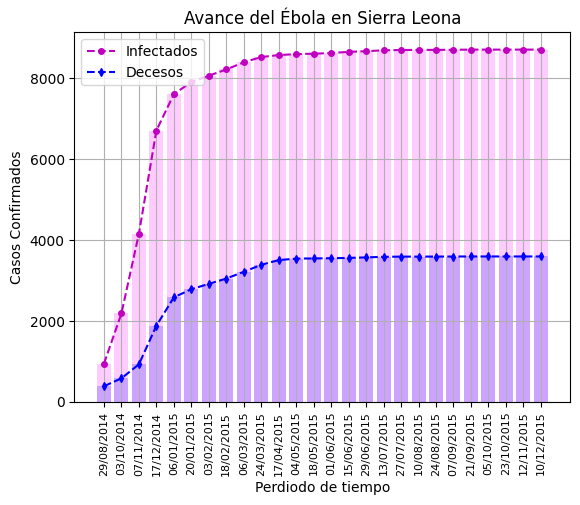

In [28]:
plt.plot(Dates,NCC,'o--m',ms= 4,label='Infectados')
plt.bar(Dates,NCC, color = 'magenta', alpha= 0.2) #Añade barras
plt.plot(Dates,NCD,'d--b',ms= 4,label='Decesos')
plt.bar(Dates,NCD, color = 'blue', alpha= 0.2) #Añade barras
plt.grid()
plt.title('Avance del Ébola en Sierra Leona')
plt.ylabel('Casos Confirmados')
plt.xlabel('Perdiodo de tiempo')
plt.xticks(rotation=90,fontsize=8) #Acomodamos las variables del eje x
plt.legend() #Cuadrito de información
plt.savefig("Barras_SL.png", dpi = 300,format = 'png')
plt.show()

In [29]:
PIvsD = 100*SL['No. of confirmed deaths']/SL['No. of confirmed cases']
PIvsD

Date
29/08/2014    40.641711
05/09/2014    38.656195
08/09/2014    37.358185
12/09/2014    37.140637
16/09/2014    35.109290
                ...    
17/12/2015    41.233915
22/12/2015    41.233915
23/12/2015    41.233915
29/12/2015    41.233915
23/03/2016    41.233915
Length: 259, dtype: float64

In [30]:
SL['PIvsD']=PIvsD

In [31]:
SL.head()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD
Date,,,,,,,,,,,
29/08/2014,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40,40.641711
05/09/2014,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84,38.656195
08/09/2014,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36,37.358185
12/09/2014,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48,37.140637
16/09/2014,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56,35.109290


In [32]:
recuperados = ((100-PIvsD)/100)*SL['No. of confirmed cases']
SL['recuperados'] = recuperados

In [33]:
SL['PR'] = (100-PIvsD)

In [34]:
SL.head()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD,recuperados,PR
Date,,,,,,,,,,,,,
29/08/2014,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40,40.641711,555.0,59.358289
05/09/2014,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84,38.656195,703.0,61.343805
08/09/2014,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36,37.358185,773.0,62.641815
12/09/2014,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48,37.140637,809.0,62.859363
16/09/2014,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56,35.109290,950.0,64.890710


In [35]:
PIvsD_mean = SL['PIvsD'].mean()
PR_mean = SL['PR'].mean()
porcentajes = [PIvsD_mean,PR_mean]
etiquetas = ['PIvsD','PR']

<function matplotlib.pyplot.show(close=None, block=None)>

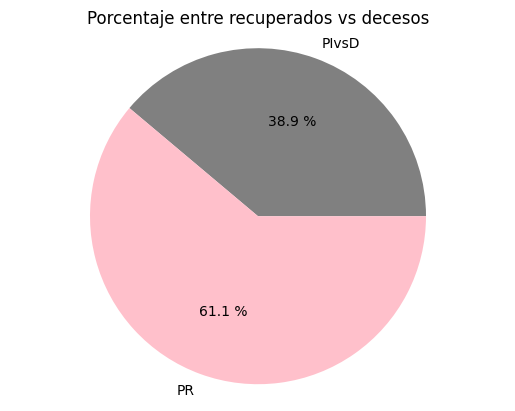

In [36]:
plt.pie(porcentajes,labels=etiquetas,autopct='%0.1f %%', colors=['gray','pink'])
plt.axis("equal")
plt.title('Porcentaje entre recuperados vs decesos')
plt.savefig("Pastel_PIvsD_PR", dpi = 300,format = 'png')
plt.show

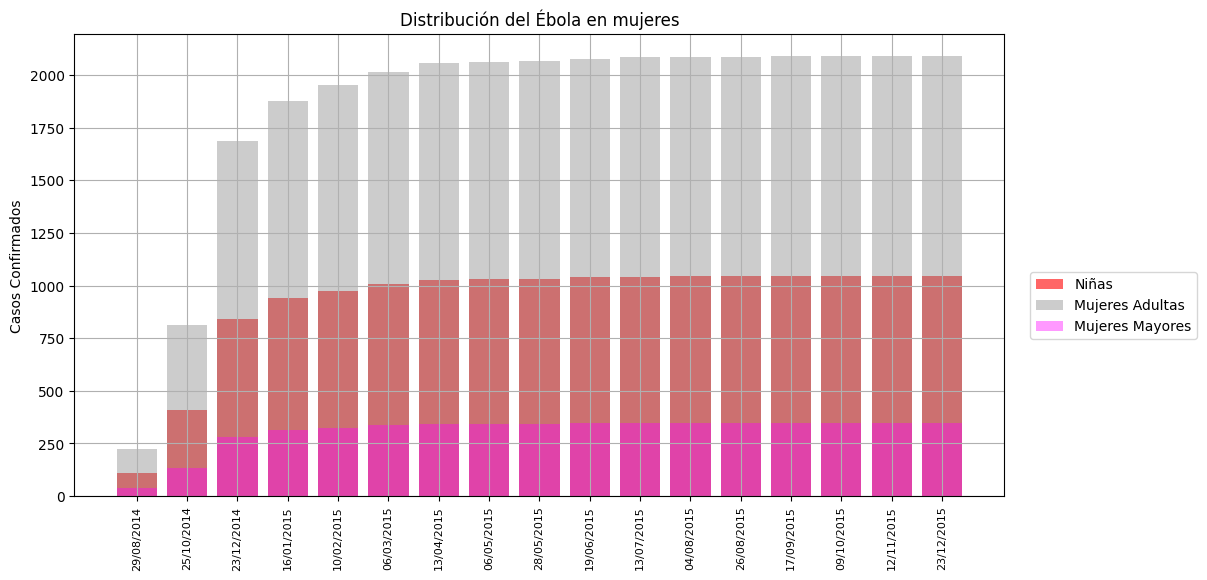

In [61]:
G = SL['Girls'][0:-1:16]
AF = SL['Adult Female'][0:-1:16]
OF = SL['Old Female'][0:-1:16]
Dates = SL.index[0:-1:16]

fig = plt.figure(figsize=(12,6))
plt.bar(Dates,G,color='red',alpha=0.6,label='Niñas')
plt.bar(Dates,AF,color='gray',alpha=0.4,label='Mujeres Adultas')
plt.bar(Dates,OF,color='magenta',alpha=0.4,label='Mujeres Mayores')
plt.grid()
plt.title('Distribución del Ébola en mujeres')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=90,fontsize=8)
plt.legend(loc='upper left',bbox_to_anchor=(1.02,0.5))
plt.savefig('FemaleSL.png',dpi = 300,format = 'png')
plt.show()

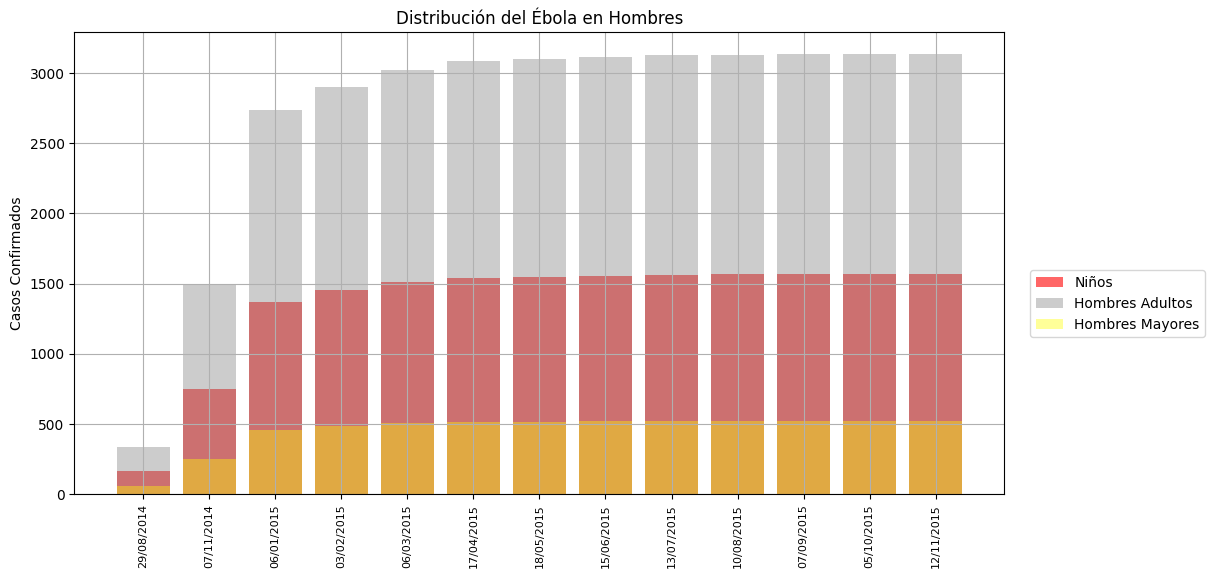

In [60]:
G = SL['Boys'][0:-1:20]
AF = SL['Adult Male'][0:-1:20]
OF = SL['Old Male'][0:-1:20]
Dates = SL.index[0:-1:20]

fig = plt.figure(figsize=(12,6))
plt.bar(Dates,G,color='red',alpha=0.6,label='Niños')
plt.bar(Dates,AF,color='gray',alpha=0.4,label='Hombres Adultos')
plt.bar(Dates,OF,color='yellow',alpha=0.4,label='Hombres Mayores')
plt.grid()
plt.title('Distribución del Ébola en Hombres')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=90,fontsize=8)
plt.legend(loc='upper left',bbox_to_anchor=(1.02,0.5))
plt.savefig('MaleSL.png',dpi = 300,format = 'png')
plt.show()

In [67]:
Boys = SL['Boys'].to_numpy()
SL_Boys=pd.DataFrame({'Boys':Boys})
SL.Boys.index=pd.to_datetime(SL.index,format='%d/%m/%Y')
SL_Boys=SL_Boys.sort_index()

In [81]:
SL.Boys

Date
2014-08-29     168.30
2014-09-05     206.28
2014-09-08     222.12
2014-09-12     231.66
2014-09-16     263.52
               ...   
2015-12-17    1566.72
2015-12-22    1566.72
2015-12-23    1566.72
2015-12-29    1566.72
2016-03-23    1566.72
Name: Boys, Length: 259, dtype: float64

In [71]:
steps = 57

data_train=SL_Boys[:-steps]
data_test=SL_Boys[-steps:]

In [72]:
print(f'Las fechas son {len(data_train)}')

Las fechas son 202


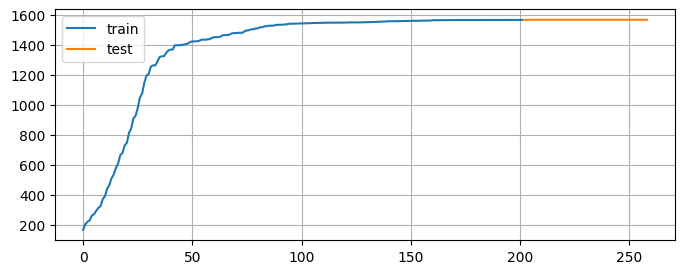

In [91]:
fig,ax=plt.subplots(figsize=(8,3))
data_train['Boys'].plot(ax=ax,label='train')
data_test['Boys'].plot(ax=ax,label='test')
plt.grid()
ax.legend()
plt.show()

In [77]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor

In [79]:
forecaster = ForecasterAutoreg(
    regressor = RandomForestRegressor(random_state=123),
    lags = 6
)

In [86]:
forecaster.fit(y=data_train['Boys'])

In [85]:
steps = 57
predicciones = forecaster.predict(steps=steps)

In [87]:
predicciones.index=data_test.index

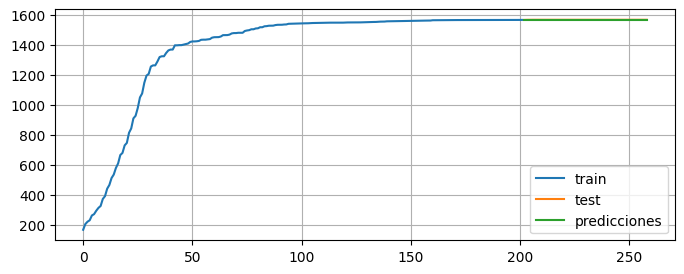

In [90]:
fig,ax=plt.subplots(figsize=(8,3))
data_train['Boys'].plot(ax=ax,label='train')
data_test['Boys'].plot(ax=ax,label='test')
predicciones.plot(ax=ax,label='predicciones')
ax.legend()
plt.grid()
plt.show()